In [1]:
from torch_snippets import load_torch_model_weights_to, Glob
from icevision.all import *

2021-07-17 20:12:57.070 | WARNING  | torch_snippets:<module>:13 - sklearn is not found. Skipping relevant imports from submodule `sklegos`
Exception: No module named 'sklego'


In [2]:
model_type = models.torchvision.retinanet
backbone = model_type.backbones.resnet50_fpn(pretrained=True)
model = model_type.model(backbone=backbone(pretrained=True), num_classes=2+1) 

In [3]:
load_torch_model_weights_to(model, 'models/0.pth')

INFO     - Loaded weights from models/0.pth to given model | __main__:<module>:1


In [15]:
from torch_snippets import load_torch_model_weights_to, Glob, read
# note that this is a fake test folder which
# i created by copy pasting images from 
# train folder. We need to put actual images
# here
images = [read(f, 1) for f in Glob('test')]
infer_ds = Dataset.from_images(
    images, 
    tfm=tfms.A.Adapter([
        tfms.A.Normalize()
    ]),
    class_map = ClassMap(['YES','NO'])
)
infer_dl = model_type.infer_dl(infer_ds, batch_size=1)
preds = model_type.predict_from_dl(
    model=model, 
    infer_dl=infer_dl,
    detection_threshold=0.35,
    keep_images=True
)

INFO     - 30 files found at test | __main__:<module>:2


  0%|          | 0/30 [00:00<?, ?it/s]

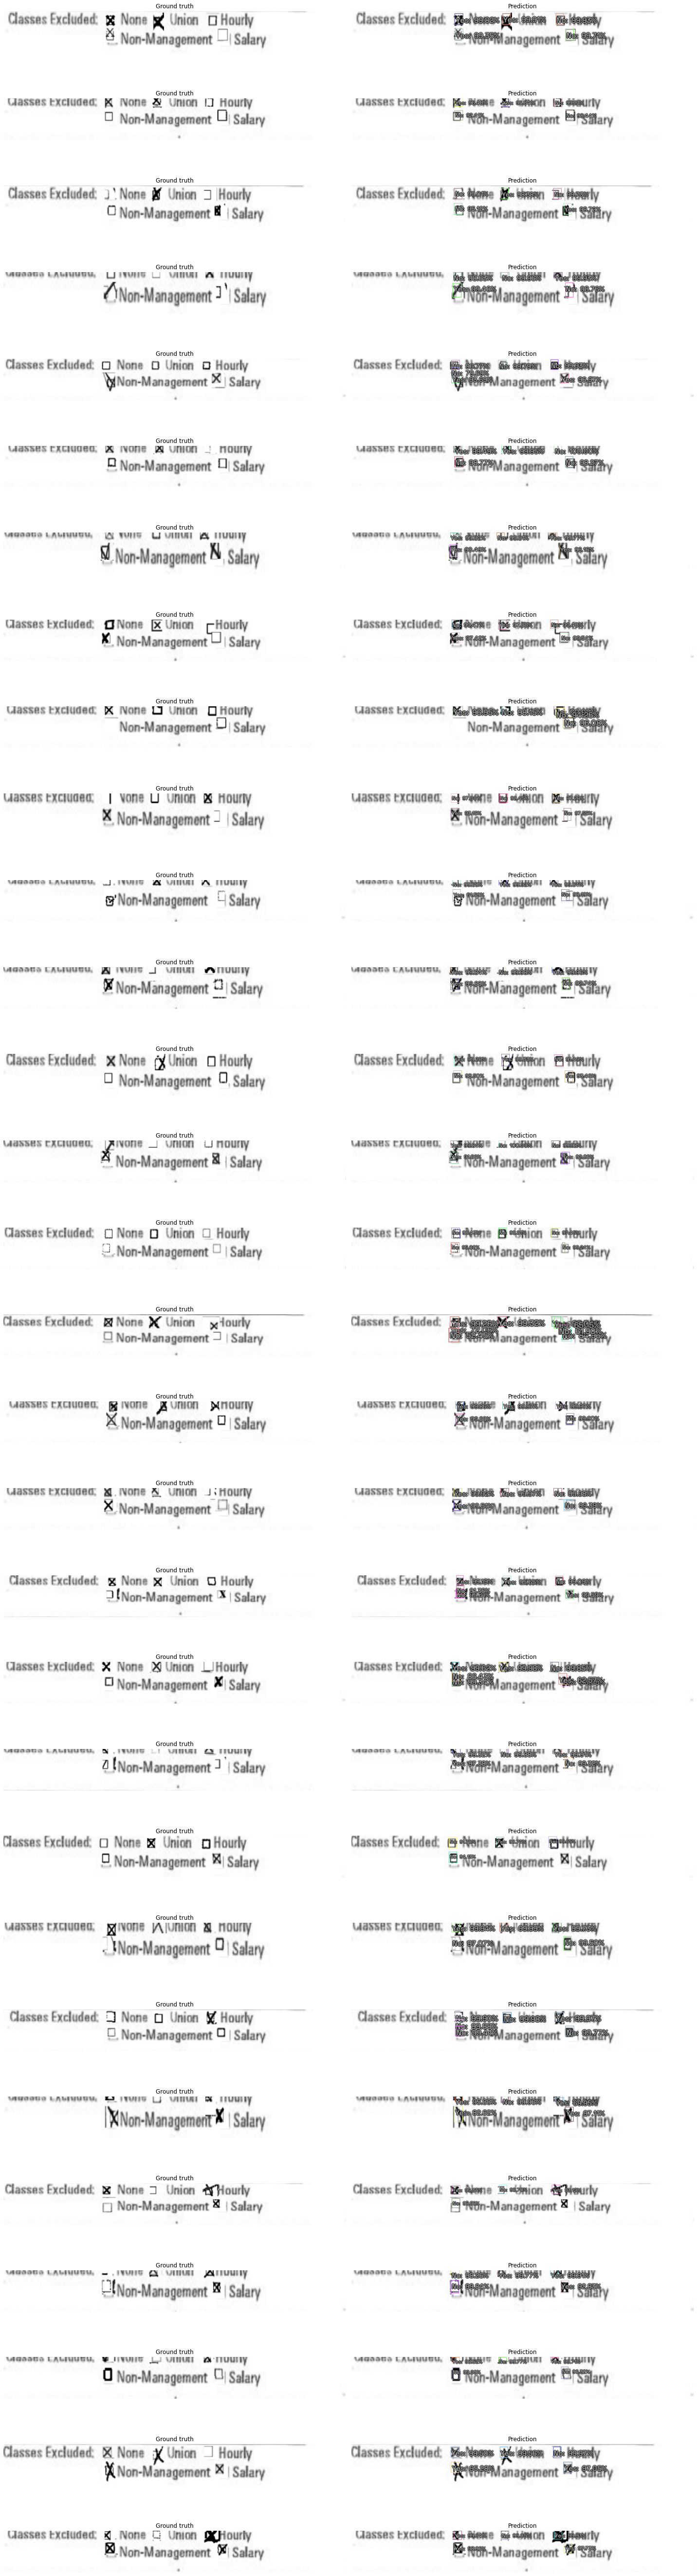

In [16]:
N = len(preds)
show_preds(
    preds=preds,
    figsize=(20,int(2.5*N))
)